# Predicting House Prices with Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv('C:/Users/Student/Downloads/archive (1)/Housing.csv')
dataset.head()

C:\Users\Student\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# Handling missing values
dataset.dropna(inplace=True)

# Removing duplicates
dataset.drop_duplicates(inplace=True)

In [3]:

# Convert categorical variables to numerical using one-hot encoding
dataset = pd.get_dummies(dataset, drop_first=True)

# Separate features and target variable
X = dataset.drop(columns=['price'])
y = dataset['price']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print("\nFeature Importance:")
print(feature_importances)

# Select features based on importance
sfm = SelectFromModel(rf, threshold=0.05)  # Adjust threshold as per importance
sfm.fit(X_train, y_train)

# Transform the features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train a model with selected features
rf_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected = rf_selected.predict(X_test_selected)

# Evaluate the model
mse_selected = mean_squared_error(y_test, y_pred_selected)
print("\nMean Squared Error with selected features:", mse_selected)

# Print selected features
selected_features = X.columns[sfm.get_support()]
print("\nSelected Features:")
print(selected_features)



Feature Importance:
                                 importance
area                               0.468430
bathrooms                          0.151483
airconditioning_yes                0.062672
parking                            0.057455
stories                            0.057133
bedrooms                           0.048413
furnishingstatus_unfurnished       0.035011
basement_yes                       0.030823
prefarea_yes                       0.030689
hotwaterheating_yes                0.017226
guestroom_yes                      0.016724
furnishingstatus_semi-furnished    0.013692
mainroad_yes                       0.010250

Mean Squared Error with selected features: 2279671450086.014

Selected Features:
Index(['area', 'bathrooms', 'stories', 'parking', 'airconditioning_yes'], dtype='object')


In [4]:


# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print(model.score(X_test, y_test))

Mean Squared Error: 1754318687330.6628
0.6529242642153186


Line regression score: 0.19947240111416364


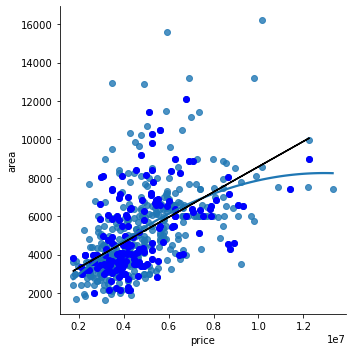

In [5]:
dataset_binary = dataset[['price', 'area']]
dataset_binary.head()

#Exploring the data scatter
sns.lmplot(x ="price", y ="area", data = dataset_binary, order = 2, ci = None)

# Converting each dataframe into a numpy array 
X = np.array(dataset_binary['price']).reshape(-1, 1)

y = np.array(dataset_binary['area']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# Splitting the data into training and testing data

regr = LinearRegression()

regr.fit(X_train, y_train)

print("Line regression score:",regr.score(X_test, y_test))

y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')

plt.show()

In [6]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 3211450.5463923165


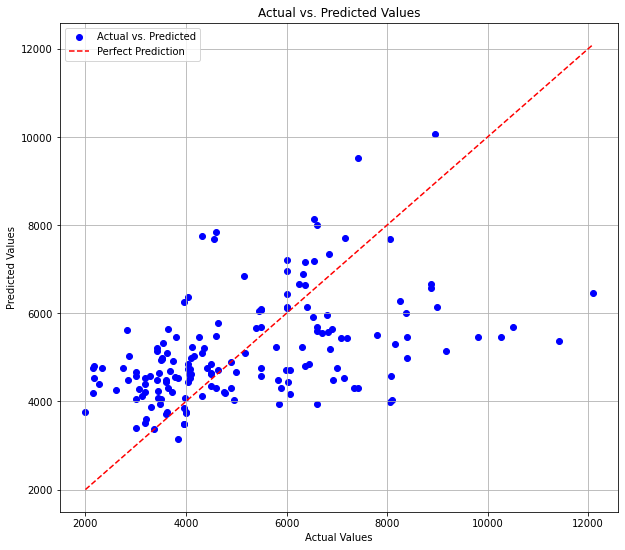

In [7]:
plt.figure(figsize=(10, 9))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()